## Notes:

In the rest of the notebook, the term `data matrix` refers to a two dimensional numpy array where instances are encoded as rows, e.g. a data matrix with 100 rows and 4 columns is to be interpreted as a collection of 100 instances each with four features.  

When a required function can be implemented directly by a library function it is intended that the candidate should write her own implementation of the function, e.g. a function to compute the accuracy or the cross validation.

Some questions are just a check-point, i.e. it is for you to see that you are correctly implementing all functions. Since those check-points use functions that you have already implemented and that have already been marked, those questions are not going to be marked (i.e. they appear as having marks 0).

In [122]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

# unit test utilities: you can ignore these function
def is_approximately_equal(test,target,eps=1e-2):
    return np.mean(np.fabs(np.array(test) - np.array(target)))<eps

def assert_test_equality(test, target):
    assert is_approximately_equal(test, target), 'Expected:\n %s \nbut got:\n %s'%(target, test)

## Question 1 

a) Make a function `data_matrix = make_data_classification(mean, std, n_centres, inner_std, n_samples, random_seed=42)` to create a data matrix according to the following rules:
1. `mean` is a n-dimensional vector (say [1,1], but the function should allow vectors of any dimension)
2. `n_centres` is the number of centres (say 3) 
3. `std` is the standard deviation (say 1)
4. the centres are sampled from a Normal distribution with mean `mean` and standard deviation `std`
5. from each centre sample `n_samples` from a Normal distribution with the centre as the mean and standard deviation `inner_std`
so if `mean=[1,1]` `n_centres=3` and `n_samples=10` then the data matrix will be a 30 rows x 2 columns numpy array.

b) Make a function `data_matrix, targets = make_data_regression(mean, std, n_centres, inner_std, n_samples, random_seed=42)` to create a data matrix  and a target vector according to the following rules:
1. the data matrix is constructed in the same way as in `make_data_classification`
2. the targets are the Euclidean distance between the sample and the centre of the generating Normal distribution

See Question 3 for a graphical example of the expected output.

In [123]:
import math

def partition(num,partition):
    return ([num // partition + (1 if x < num % partition else 0)  for x in range (partition)])

def make_data_classification(mean, std, n_centres, inner_std, n_samples, random_seed=42):
    output = []
    np.random.seed(random_seed)
    mean = np.array(mean)
    n_features = mean.shape[0]
    centers = np.random.normal(loc=mean, scale=std, size=(n_centres, n_features))
    for point,center in enumerate(centers):
        output.append(np.random.normal(loc=point,scale=inner_std, size=(n_samples, n_features)))
    output = np.concatenate(output)
    return output

def make_data_regression(mean, std, n_centres, inner_std, n_samples, random_seed=42):
    np.random.seed(random_seed)
    mean = np.array(mean)
    n_features = mean.shape[0]
    centers = np.random.normal(loc=mean, scale=std, size=(n_centres, n_features))
    X = []
    y = []
    for center in centers:
            sample = np.random.normal(loc=center, scale=inner_std, size=(n_samples, n_features))
            target = [np.linalg.norm(data_point - center) for data_point in sample]
            X.append(sample)
            y.append(target)   
    X = np.concatenate(X)
    y = np.concatenate(y)
    return X,y

In [3]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [4]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 2  

a) Make a function `data_matrix, targets = get_dataset_classification(n_samples, std, inner_std)` to create a data matrix and a target vector for a binary classification problem according to the following rules:
- the instances from the positive class are generated according to the same rules provided for `make_data_classification`; so are the instances from the negative class 
- the number of samples for the postive and negative class are balanced
- instances from the positive class have as mean the vector [10,10] and those from the negative class, vector [-10,-10]
- the number of centres is fixed to 3
- the random seed is fixed to 42
- `n_samples` indicates the total number of instances finally available in the output `data_matrix`

b) Make a function `data_matrix, targets = get_dataset_regression(n_samples, std, inner_std)` to create a data matrix according to the following rules:
- the instances are generated according to the same rules provided for `make_data_regression`
- the targets are generated according to the same rules provided for `make_data_regression`
- instances have as mean the vector [10,10]
- the number of centres is fixed to 3
- the random seed is fixed to 42
- `n_samples` indicates the total number of instances finally available in the output `data_matrix`

In [137]:
def get_dataset_classification(n_samples, std, inner_std):
    n_features = 2
    n_centres = 3
    np.random.seed(42)
    mean = [-10, -10]
    Xp,Xn = [],[]
    class_partition = partition(n_samples,2)
    pos_partition = partition(class_partition[0],n_centres)
    neg_partition = partition(class_partition[1],n_centres)
    
    p_centers = np.random.normal(loc=np.fabs(mean), scale=std, size=(n_centres, n_features))
    for i,point in enumerate(p_centers):
        Xp.append(np.random.normal(loc=p_centers[i],scale=inner_std, size=(pos_partition[i], n_features)))
        
    np.random.seed(42)
    n_centers = np.random.normal(loc=mean, scale=std, size=(n_centres, n_features))
    for i,point in enumerate(n_centers):
        Xn.append(np.random.normal(loc=n_centers[i],scale=inner_std, size=(neg_partition[i], n_features)))
    Xp = np.concatenate(Xp)
    yp = np.ones((len(Xp),))
    Xn = np.concatenate(Xn)
    yn = np.zeros((len(Xn),))    
    return np.concatenate((Xp,Xn)), np.concatenate((yp, yn), axis=0)

def get_dataset_regression(n_samples, std, inner_std):
    n_features = 2
    n_centres = 3
    np.random.seed(42)
    mean_pos_class = [10, 10]
    samples = partition(n_samples, n_centres)
    y = []
    X = []
    centers = np.random.normal(loc=mean_pos_class, scale=std, size=(n_centres, n_features))
    for i, sample in enumerate(samples):
        s = np.random.normal(loc=centers[i], scale=inner_std, size=(sample, n_features))
        X.append(s)
        target = [np.linalg.norm(data_point - centers[i]) for data_point in s]
        y.append(target)
 
    X = np.concatenate(X)
    y = np.concatenate(y)    
    return X,y


In [6]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 3 

Make a function `plot(X,y)` to display the scatter plot of a data matrix of two dimensional instances using the array `y` to assign the colour to the instances.


When running 

```python
X, y = get_dataset_regression(n_samples=600, std=30, inner_std=5)
plot(X,y)
```
you should get something like

<img src='plot3.png' width=300>

and when running

```python
X, y = get_dataset_classification(n_samples=600, std=30, inner_std=5)
plot(X,y)
```
you should get something like

<img src='plot3b.png' width=300>

In [186]:
def plot(X,y):
    assert X.ndim == 2
    x0,x1 = X.T
    plt.figure(figsize=(7,7))
    if y is None:
        plt.scatter(x0,x1,edgecolor='w')
    else:
        plt.scatter(x0,x1,c=y,edgecolor='w')
    plt.show()
    

In [8]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 4 

Make a function `classification_error(targets, preds)` to compute the fraction of times that the entries in `targets` do not agree with the corresponding entries in `preds`.

**Note:** do not use library functions to compute the result directly but implement your own version.

In [9]:
def classification_error(targets, preds):
    return np.sum(targets != preds, axis=0) / len(targets)

In [10]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 5 

Make a function `regression_error(targets, preds)` to compute the mean squared error between `targets` and `preds`.

$${\displaystyle \operatorname {MSE} ={\frac {1}{n}}\sum _{i=1}^{n}(T_{i}-{ {P_{i}}})^{2}.}$$

**Note:** do not use library functions to compute the result directly but implement your own version.

In [11]:
def regression_error(targets, preds):
    return np.mean((targets - preds)**2)

In [12]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 6 

Make a function `make_bootstrap(data_matrix, targets)` to extract a bootstrapped replicate of an input dataset. 

The function should return the following 6 elements (in this order): `bootstrap_data_matrix, bootstrap_targets, bootstrap_sample_ids, oob_data_matrix, oob_targets, oob_samples_ids`, where:
1. `bootstrap_data_matrix`: is a data matrix encoding the bootstrapped replicate of the data matrix; the number of instances in `bootstrap_data_matrix` is equal to the number of instances in `data_matrix`
2. `bootstrap_targets`: is the corresponding bootstrapped replicate of the target vector
3. `bootstrap_sample_ids`: is an array containing the instance indices of the bootstrapped replicate of the data matrix
4. `oob_data_matrix`: is a data matrix encoding the out of bag instances 
5. `oob_targets`: is the corresponding out of bag instances of the target vector
6. `oob_samples_ids`: is an array containing the instance indices of the out of bag instances 

In [13]:
def make_bootstrap(data_matrix, targets):
    bootstrap_sample_ids = np.random.choice(data_matrix.shape[0],data_matrix.shape[0])
    oob_sample_ids = np.setdiff1d(range(data_matrix.shape[0]), bootstrap_sample_ids)
    return data_matrix[bootstrap_sample_ids,:],targets[bootstrap_sample_ids],bootstrap_sample_ids,data_matrix[oob_sample_ids,:],targets[oob_sample_ids],oob_sample_ids

In [14]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [15]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 7 

Consider the following functional blueprints `estimator = train(X_train, y_train, param)` and `test(X_test, estimator)`. A function of type `train` takes in input a data matrix `X_train` a target vector `y_train` and a single value `param` (not a list of parameters). A function of type `train` outputs an object that represent an estimator. A function of type `test` takes in input a data matrix `X_test` the fit object `estimator` and outputs the predicted targets.

Using this blueprint, write the specialised train and test functions for the following classifiers and regressors (use the function signature provided in the next cell, e.g. `train_ab` for training an adaboost classifier):

Classifiers:
- a) k-nearest-neighbor: the parameter controls the number of neighbors (you may use KNeighborsClassifier from scikit) `[train_knn, test_knn]`
- b) adaboost: the parameter controls the maximal depth of the decision tree uses as weak classifier (you may use the DecisionTreeClassifier from scikit but **you should provide your own implementation of the boosting algorithm**) `[train_ab, test_ab]`
- c) random forest: the parameter controls the maximal depth of the tree (you may use the DecisionTreeClassifier from scikit but **you should provide your own implementation of the bagging algorithm**) `[train_rfc, test_rfc]`

Regressors:
- d) decision tree: the parameter controls the maximal depth of the tree (you may use the DecisionTreeRegressor from scikit) `[train_dt, test_dt]`
- e) svm linear: the parameter controls the regularization constant C (you may use SVR from scikit) `[train_svm_1, test_svm]`
- f) svm with a polynomial kernel of degree 2: the parameter controls the regularization constant C  (you may use SVR from scikit) `[train_svm_2, test_svm]`
- g) svm with a polynomial kernel of degree 3: the parameter controls the regularization constant C  (you may use SVR from scikit) `[train_svm_3, test_svm]`
- h) random forest: the parameter controls the maximal depth of the tree (you may use the DecisionTreeRegressor from scikit but **you should provide your own implementation of the bagging algorithm**) `[train_rf, test_rf]`

For the algorithms `adaboost` and `random forest`, the size of the ensemble should be fixed to 100.

In [75]:
# classifiers
from sklearn.neighbors import KNeighborsClassifier

def train_knn(X_train, y_train, param):
    model = KNeighborsClassifier(n_neighbors=param)
    return model.fit(X_train, y_train)

def test_knn(X_test, est):
    return est.predict(X_test)

from sklearn.tree import DecisionTreeClassifier

def train_ab(X_train, y_train, param):
    estimator = []
    n = X_train.shape[0]
    # init numpy arrays
    sample_weights = np.zeros(shape=(100, n))
    stumps = np.zeros(shape=100, dtype=object)
    stump_weights = np.zeros(shape=100)
    errors = np.zeros(shape=100)
    # initialize weights uniformly
    sample_weights[0] = np.ones(shape=n) / n
 
    for t in range(100):
        # fit  weak learner
        curr_sample_weights = sample_weights[t]
        stump = DecisionTreeClassifier(max_depth=param)
        stump = stump.fit(X_train, y_train, sample_weight=curr_sample_weights)
        # calculate error and stump weight from weak learner prediction
        stump_pred = stump.predict(X_train)
        err = curr_sample_weights[(stump_pred != y_train)].sum()# / n
        stump_weight = np.log((1 - err) / err) / 2
        # update sample weights
        new_sample_weights = (
            curr_sample_weights * np.exp(-stump_weight * y_train * stump_pred))
        new_sample_weights /= new_sample_weights.sum()
        # If not final iteration, update sample weights for t+1
        if t+1 < 100:
            sample_weights[t+1] = new_sample_weights
        # save results of iteration
        stumps[t] = stump
        stump_weights[t] = stump_weight
        errors[t] = err
        estimator.append((stump_weight,stump))
    return estimator

def test_ab(X_test, models):
    preds = np.hstack([alpha * clf.predict(X_test).reshape(-1,1) for alpha,clf in models])
    preds = np.sign(np.sum(preds, axis=1))
    return preds

from sklearn.tree import DecisionTreeClassifier

def train_rfc(X_train, y_train, param):
    models  = []
    for _ in range(100):
        bootstrap_data_matrix, target, _,_,_,_ = make_bootstrap(X_train, y_train)
        models.append(DecisionTreeClassifier(max_depth=param).fit(bootstrap_data_matrix, target))
    return models

def test_rfc(X_test, models):
    if isinstance(models, list):
        preds = [model.predict(X_test) for model in models]
        preds,_ = sp.stats.mode(preds)
        preds = preds.reshape(-1)
    else:
        preds = models.predict(X_test)
    return preds

# regressors
from sklearn.tree import DecisionTreeRegressor

def train_dt(X_train, y_train, param):
    model = DecisionTreeRegressor(max_depth=param)
    return model.fit(X_train, y_train)

def test_dt(X_test, est):
    return est.predict(X_test)

from sklearn.svm import SVR

def train_svm_1(X_train, y_train, param):
    model = SVR(kernel='linear',C=param)
    return model.fit(X_train,y_train)

def train_svm_2(X_train, y_train, param):
    model = SVR(kernel='poly',degree=2,C=param)
    return model.fit(X_train,y_train)

def train_svm_3(X_train, y_train, param):
    model = SVR(kernel='poly',degree=3,C=param)
    return model.fit(X_train,y_train)

#Note: you do not need to specialise the svm test function for each degree
def test_svm(X_test, est):
    return est.predict(X_test)


from sklearn.tree import DecisionTreeRegressor

def train_rf(X_train, y_train, param):
    models = []
    for model_no in range(100):
        model_train, model_target,_,_,_,_ = make_bootstrap(X_train,y_train)
        model = DecisionTreeRegressor(max_depth=param, max_features='sqrt')
        models.append(model.fit(model_train, model_target))
    return models

def test_rf(X_test, models):
    if isinstance(models,list):
        preds = np.asarray([m.predict(X_test) for m in models])
        preds = np.asarray([np.mean((preds[:,i])) for i in range(preds.shape[1])])
        return preds
    return models.predict(X_test) 

In [17]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [18]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [19]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [20]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [21]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [22]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 8 

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions. Since this cell uses functions that you have already implemented and that have already been marked, this Question is not going to be marked.


Make a dataset using

```python
X, y = get_dataset_classification(n_samples=240, std=30, inner_std=10)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)

```

and check that the classification error for 
- k-nearest-neighbor
- random forest classifier
- adaboost

In [141]:
# Just run the following code, do not modify it
X, y = get_dataset_classification(n_samples=240, std=30, inner_std=10)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)
param=3
e_knn = classification_error(y_test, test_knn(X_test, train_knn(X_train, y_train, param)))
e_rfc = classification_error(y_test, test_rfc(X_test, train_rfc(X_train, y_train, param)))
e_ab = classification_error(y_test, test_ab(X_test, train_ab(X_train, y_train, param)))
print(e_knn, e_rfc, e_ab)

0.16666666666666666 0.19444444444444445 0.16666666666666666


## Question 9 

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions. Since this cell uses functions that you have already implemented and that have already been marked, this Question is not going to be marked.

Make a dataset using

```python
X, y = get_dataset_regression(n_samples=120, std=30, inner_std=10)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)

```

and check that the regression error for these regressors
- decision tree
- svm with polynomial kernel of degree 2
- svm with polynomial kernel of degree 3

is approximately comparable.

In [144]:
# Just run the following code, do not modify it
X, y = get_dataset_regression(n_samples=120, std=30, inner_std=10)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)
param=3
e_dt = regression_error(y_test, test_dt(X_test, train_dt(X_train, y_train, param)))
e_svm2 = regression_error(y_test, test_svm(X_test, train_svm_2(X_train, y_train, param)))
e_svm3 = regression_error(y_test, test_svm(X_test, train_svm_3(X_train, y_train, param)))
print(e_dt, e_svm2, e_svm3)

39.938435099457486 39.362837632395674 43.647308264187274


## Question 10

Make a function `sizes, train_errors, test_errors = compute_learning_curve(train_func, test_func, param, X, y, test_size, n_steps, n_repetitions)` to compute the train and test errors as mandated in the learning curve approach.  

The regressor will be trained via `train_func` on the problem `data_matrix`, `targets` with parameter `param`. The estimate will be done averaging a number of replicates equal to `n_repetitions`, i.e. the code needs to repeat the process  `n_repetitions` times (say 10) and average the error. 

Note that a fraction of the data as indicated by `test_size` (say 0.3 for 30%) is going to be reserved for testing purposes. The remaining amount of data can be used in the training phase. The learning curve should be computed for an amount of training material that varies from a **minimum of 2 instances** up to all the instances available for training. The paramter `n_steps` defines the number of datasets of different size that are computed; e.g. if the number of available instances for training is 100 and `n_steps=5`, then one would perform experiments with datasets of size `[  2,  26,  51,  75, 100]`.

You should use the function `regression_error` to compute the error.


**Note:** do not use library functions (e.g. `learning_curve` in scikit) to compute the result directly but implement your own version.

In [176]:
import random
def estimate_error(train_func, test_func, param, X_train, y_train, X_test, y_test):
    model = train_func(X_train, y_train, param=param)
    y_train_pred = test_func(X_train, model)
    y_test_pred = test_func(X_test, model)
    train_err = regression_error(y_train, y_train_pred)
    test_err = regression_error(y_test, y_test_pred)
    return train_err, test_err

def compute_learning_curve(train_func, test_func, param, X, y, test_size, n_steps, n_repetitions):
    test_error_means = []
    train_error_means = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    partions = np.linspace(2, len(X_train), n_steps).astype('int')
    for partion in partions:
        testErrors = []
        trainErrors = []
        for d in range(n_repetitions):
            idx = random.sample(range(0,len(y_train)),partion)
            train_err, test_err = estimate_error(train_func, test_func, param, X_train[idx], y_train[idx], X_test, y_test)
            testErrors.append(test_err)
            trainErrors.append(train_err)
        test_error_means.append(np.mean(testErrors))
        train_error_means.append(np.mean(trainErrors))  
    return partions,train_error_means,test_error_means


In [167]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [27]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 11 

Make a function `plot_learning_curve(sizes, train_errors, test_errors)` to display the train and test error as a function of the size of the training set. 

You should get something like:

<img src='plot11.png' width=400>

In [146]:
def plot_learning_curve(sizes, train_errors, test_errors):
    plt.plot(sizes, test_errors, label = 'test')
    plt.plot(sizes, train_errors, '--', label = 'train')
    plt.grid()
    plt.legend()
    plt.show()

In [29]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 12 

Make a function `estimate_asymptotic_error(sizes, train_errors, test_errors)` that returns an estimate of the asymptotic or Bayes error, i.e. the error made in the limit of an infinitely large training set.

In [30]:
def estimate_asymptotic_error(sizes, train_errors, test_errors):
    bayes_error = np.sum((np.array(train_errors)+np.array(test_errors))/2)/len(sizes)
    return bayes_error

In [31]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 13 

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions. Since this cell uses functions that you have already implemented and that have already been marked, this Question is not going to be marked.


When you run:
```python
X, y = get_dataset_regression(n_samples=800, std=30, inner_std=10)
train_func, test_func = train_dt, test_dt
param=5
sizes, train_errors, test_errors = compute_learning_curve(train_func, test_func, param, X, y, test_size=.3, n_steps=10, n_repetitions=100)
e = estimate_asymptotic_error(train_errors, test_errors)
print('Asymptotic error: %.1f'%e)
plot_learning_curve(sizes, train_errors, test_errors)
```

you should get something like

<img src='plot12.png' width=400>


Asymptotic error: 23.3


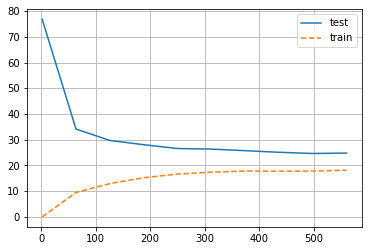

In [187]:
# Just run the following code, do not modify it
X, y = get_dataset_regression(n_samples=800, std=30, inner_std=10)
train_func, test_func = train_dt, test_dt
param=5
sizes, train_errors, test_errors = compute_learning_curve(train_func, test_func, param, X, y, test_size=.3, n_steps=10, n_repetitions=100)
e = estimate_asymptotic_error(sizes, train_errors, test_errors)
print('Asymptotic error: %.1f'%e)
plot_learning_curve(sizes, train_errors, test_errors)

## Question 14

Make a function `bias2, variance = compute_bias_variance(predictions_dict, targets)` that takes in input a dictionary of lists of predictions indexed by the instance index, and the target vector. The function should compute the squared bias component of the error and the variance components of the error for each instance.

As a toy example consider: `predictions_dict={0:[1,1,1], 1:[1,-1], 2:[-1,-1,-1,1]}` and `targets=[1,1,-1]`, that is, for instance with index 0 there are 3 predictions available `[1,1,1]`, instead for instance with index 1 there are only 2 predictions available `[1,-1]`, etc. In this case, you should get `bias2=[0.  , 1.  , 0.25]` and `variance=[0.  , 1.  , 0.75]`.

Note that if you apply Bessel's correction and divide by the number of instances - 1 rather than by the number of instance you will obtain, for small datasets, slightly different results (e.g. `variance=[[0. , 2. , 1.]` in the example). Either solutions are acceptable.

In [33]:
def compute_bias_variance(predictions_dict, targets): 
    assert len(predictions_dict) == len(targets)
    #Compute Expected prediction
    bias2 = np.array([])
    variance = np.array([])
    for index, instance in enumerate(predictions_dict):
        h_x = sum(predictions_dict[instance])/len(predictions_dict[instance])
        bias2 = np.append(bias2, (h_x - targets[index])**2)
        variance = np.append(variance, sum((h_x - np.array(predictions_dict[instance]))**2)/(len(predictions_dict[instance])))
    return bias2, variance

In [34]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 15 

Make a function `bias2, variance = bias_variance_decomposition(train_func, test_func, param, data_matrix, targets, n_bootstraps)` to compute the bias variance decomposition of the error of a regressor on a given problem. The regressor will be trained via `train_func` on the problem `data_matrix`, `targets` with parameter `param`. The estimate will be done using a number of replicates equal to `n_bootstraps`.

In [177]:
def bias_variance_decomposition(train_func, test_func, param, data_matrix, targets, n_bootstraps):
    predictions_dict = {}
    predTargets = np.array([])
    for n in range(n_bootstraps):
        bootstrap_data_matrix, bootstrap_targets, bootstrap_sample_ids, \
        oob_data_matrix, oob_targets, oob_samples_ids \
        = make_bootstrap(data_matrix, targets)
       
        modelFunction = train_func(bootstrap_data_matrix, bootstrap_targets, param)
        modelPredictions = test_func(oob_data_matrix, modelFunction)
       
        for i, instanceId in enumerate(oob_samples_ids):
            if instanceId not in predictions_dict:
                predictions_dict[instanceId] = [modelPredictions[i]]
                predTargets = np.append(predTargets, oob_targets[i])
            else:
                predictions_dict[instanceId].append(modelPredictions[i])
   
    return compute_bias_variance(predictions_dict, predTargets)

In [36]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [37]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 16

Consider the following regression problem (it does not matter that the target is only 1 and -1):

```python
from sklearn.datasets import load_iris

def make_iris_data():
    X,y = load_iris(return_X_y=True)
    X=X[:,[0,2]]
    y[y==2]=0
    y[y==0]=-1
    return X,y
```

Estimate the squared bias and variance component for each instance.  

Consider as regressor a linear svm and a polynomial svm with degree 3.

What is the class of the instances that have the highest bias error on average?

In [178]:
# Just run the following code, do not modify it
from sklearn.datasets import load_iris

def make_iris_data():
    X,y = load_iris(return_X_y=True)
    X=X[:,[0,2]]
    y[y==2]=0
    y[y==0]=-1
    return X,y

X,y = make_iris_data()

bias2, variance = bias_variance_decomposition(train_svm_1, test_svm, param=2, data_matrix=X, targets=y, n_bootstraps=100)
print(np.mean(bias2[y==1]) , np.mean(bias2[y==-1]))
bias2, variance = bias_variance_decomposition(train_svm_3, test_svm, param=2, data_matrix=X, targets=y, n_bootstraps=100)
print(np.mean(bias2[y==1]) , np.mean(bias2[y==-1]))

1.4026984216187062 1.053491903461065
0.43895366455040646 0.3994041430804176


In [39]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 17

Make a function `bs,vs = compute_bias_variance_decomposition(train_func, test_func, params, data_matrix, targets, n_bootstraps)` to compute the average squared bias error component and the average variance component of the error for each parameter setting in the vector `params`. The regressor will be trained via `train_func` on the problem `data_matrix`, `targets` with parameter `param`. The estimate will be done using a number of replicates equal to `n_bootstraps`. To be clear, the vector `bs` contains the average square bias error for each parameter in `params` and the vector `vs` contains the average variance error for each parameter in `params`.

In [179]:
def compute_bias_variance_decomposition(train_func, test_func, params, data_matrix, targets, n_bootstraps):
    bias2Avg = np.array([])
    varianceAvg = np.array([])
    for param in params:
        bias2, variance = bias_variance_decomposition(train_func, test_func, param, data_matrix, targets, n_bootstraps)
        bias2Avg = np.append(bias2Avg, sum(bias2)/len(bias2))
        varianceAvg = np.append(varianceAvg, sum(variance)/len(variance))
    return bias2Avg, varianceAvg

In [41]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 18

Make a function `plot_bias_variance_decomposition(train_func, test_func, params, data_matrix, targets, n_bootstraps, logscale=False)`.

You should plot the individual components or the squared bias, the variance and the total error. You should allow the possibility to employ a logarithmic scale for the horizontal axis via the `logscale` flag.

You should get something like:

<img src='plot18.png' width=400>

In [180]:
def plot_bias_variance_decomposition(train_func, test_func, params, data_matrix, targets, n_bootstraps, logscale=False):
    bs,vs = compute_bias_variance_decomposition(train_func, test_func, params, data_matrix, targets, n_bootstraps)
    error = bs + vs
    plt.plot(params,bs,label='bias2')
    plt.plot(params,vs,label='variance')
    plt.plot(params,error,label='error')
    if logscale:
        plt.xscale('log')
    plt.xlabel('Parameters')
    plt.ylabel('Value')
    plt.title('Bias Variance Tradeoff Plot')
    plt.legend()
    plt.grid()
    plt.show()


In [43]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 19

Make a function `find_best_param_with_bias_variance_decomposition(train_func, test_func, params, data_matrix, targets, n_bootstraps)` that uses the bias variance decomposition analysis to determine which parameter among `params` achieves the smallest estimated predictive error.

In [181]:
def find_best_param_with_bias_variance_decomposition(train_func, test_func, params, data_matrix, targets, n_bootstraps):
    bs,vs = compute_bias_variance_decomposition(train_func, test_func, params, data_matrix, targets, n_bootstraps)
    error = bs + vs
    bestParameterIndex = np.where(error == min(error))[0][0]
    return params[bestParameterIndex]

In [45]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 20

When you execute the following code 
```python
X, y = get_dataset_regression(n_samples=400, std=10, inner_std=7)
params = np.linspace(1,30,30).astype(int)
train_func, test_func = train_dt, test_dt
p = find_best_param_with_bias_variance_decomposition(train_func, test_func, params, data_matrix, targets, n_bootstraps=60)
print('Best parameter:%s'%p)
plot_bias_variance_decomposition(train_func, test_func, params, data_matrix, targets, n_bootstraps=50, logscale=False)
```

You should get something like:

<img src='plot19.png' width=400>

The next unit tests will run your functions `find_best_param_with_bias_variance_decomposition` on an undisclosed dataset using as regressors:
- decision tree
- svm degree 3

and 3 marks will be awarded for each correct optimal parameter identified.

In [46]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [47]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 21

Make a function `conf_mtx = confusion_table(targets, preds)` to output the confusion matrix as a 2 x 2 Numpy array. Rows indicate the prediction and columns the target. The cell element with index [0,0] should report the true positive count. 

Running the following code:

```python
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True)
y[y==2]=0

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)

models = train_knn(X_train, y_train, param=3)
preds = test_knn(X_test, models)
conf_mtx = confusion_table(y_test, preds)
print(conf_mtx)
```
you should obtain something similar to
```
[[16.  1.]
 [ 0. 28.]]
```
Note: the exact values can differ in your run

**Note:** do not use library functions to compute the result directly but implement your own version.

In [182]:
def confusion_table(targets, preds):
    classes = np.unique(np.union1d(targets,preds))
    confusion_matrix = np.zeros((len(classes),len(classes)))
    for i in range(len(classes)):
        for j in range(len(classes)):
            confusion_matrix[i,j] = np.sum((preds == classes[j]) & (targets == classes[i]))
    return confusion_matrix.astype(int)

In [49]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 22 

Make a function `error_from_confusion_table(confusion_table_func, targets, preds)` that takes in input the previous `confusion_table` function and returns the error, i.e. the fraction of predictions that do not agree with the targets.

In [183]:
def error_from_confusion_table(confusion_table_func, targets, preds):
    matrix = confusion_table_func(targets,preds)
    return (np.sum(matrix) - np.sum(np.diag(matrix))) / len(targets)

In [51]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 23

Make a function `predictions, out_targets = cross_validation_prediction(train_func, test_func, param, data_matrix, targets, kfold)` that estimates the predictions of a classifier trained via the function `train_func` with parameter `param` on the problem `data_matrix, targets` using a k-fold cross validation strategy with the number of folds indicated by `kfold`.

Since the order of the instances associated to the predictions can be different from the original order, the function is required to output also the corresponding target values in the array `out_targets` (i.e. the value in position 10 in `predictions` corresponds to the target value in position 10 in `out_targets` )

**Note:** do not use library functions (such as `KFold` or `StratifiedKFold`) but implement your own version of the cross validation.

In [184]:
def cross_validation_prediction(train_func, test_func, param, data_matrix, targets, kfold):
    pred_results = np.array([])
    target_result = np.array([])
    for train_idx,test_idx in custom_fold(kfold,targets):
        models = train_func(data_matrix[train_idx], targets[train_idx], param=param)
        pred_results = np.concatenate((pred_results,test_func(data_matrix[test_idx], models)))
        target_result = np.concatenate((target_result,targets[test_idx]))
    return pred_results,target_result

def custom_fold(kfold,targets):
    np.random.seed(42)
    inIdx = np.arange(len(targets))
    outIdx = np.empty(0).astype(int)
    ps = partition(len(targets),kfold)
    result =[]
    for k in range(kfold):
        indexsChosen = np.random.choice(inIdx, ps[k],replace=False)
        inIdx = np.setdiff1d(inIdx,indexsChosen)
        result.append((np.concatenate((inIdx,outIdx)),indexsChosen))
        outIdx = np.concatenate((outIdx,indexsChosen))
    return result

In [53]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [54]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 24

Make a function `mean_errors = compute_errors_with_crossvalidation(train_func, test_func, params, data_matrix, targets, kfold, n_repetitions)` that returns the estimated average error for each parameter in `params`. The classifier is trained via the function `train_func` with parameters taken from `params` on the problem `data_matrix, targets` using a k-fold cross validation strategy with the number of folds indicated by `kfold`.
The error estimate is repeated a number of times indicated in `n_repetitions`. The error should be computed using the function `error_from_confusion_table`. The output vector `mean_errors` has as many entries as there are paramters in `params`.

**Note:** do not use library functions (such as `cross_val_score`) but implement your own version of the code.

In [185]:
def compute_errors_with_crossvalidation(train_func, test_func, params, data_matrix, targets, kfold, n_repetitions):
    means_erros=[]
    for param in params:
        erros = []
        for i in range(n_repetitions):
            predictions, out_targets = cross_validation_prediction(train_func,test_func,param,data_matrix,targets,kfold)
            erros.append(error_from_confusion_table(confusion_table,out_targets,predictions))
        means_erros.append(np.mean(erros))
    return means_erros

In [56]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 25

Make a function `find_best_param_with_crossvalidation(train_func, test_func, params, data_matrix, targets, kfold, n_repetitions)` that uses crossvalidation to determine which parameter among `params` achieves the smallest estimated predictive error.

In [57]:
def find_best_param_with_crossvalidation(train_func, test_func, params, data_matrix, targets, kfold, n_repetitions):
    errors = compute_errors_with_crossvalidation(train_func, test_func, params, data_matrix, targets, kfold, n_repetitions)
    return params[np.where(errors == np.min(errors))[0][0]]

In [58]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 26

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions. Since this cell uses functions that you have already implemented and that have already been marked, this Question is not going to be marked.


You should be able to run the following code:
```python
from sklearn.datasets import load_wine
X,y = load_wine(return_X_y=True)
params = [3,5,7,9,11]
train_func, test_func = train_knn, test_knn
kfold = 5
n_repetitions = 5
best_param = find_best_param_with_crossvalidation(train_func, test_func, params, data_matrix, targets, kfold, n_repetitions)
print(best_param)
```
and get a value around 3.

In [189]:
# Just run the following code, do not modify it
from sklearn.datasets import load_wine
data_matrix, targets = load_wine(return_X_y=True)
params = [3,5,7,9,11]
train_func, test_func = train_knn, test_knn
kfold = 5
n_repetitions = 5
best_param = find_best_param_with_crossvalidation(train_func, test_func, params, data_matrix, targets, kfold, n_repetitions)
print(best_param)

3
